<a href="https://colab.research.google.com/github/RicardoEscuderoA/Fundamentals-of-Machine-Learning/blob/main/Copy_of_FoML_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Welcome to today's lab session where we will focus on introducing classification models. This lab is entirely in Python and the majority of the code is provided for you. As well as this notebook, please also see the [quiz](https://canvas.sussex.ac.uk/courses/23328/quizzes/34179) on Canvas.

If you're unfamiliar with colab then please see the [documentation](https://colab.research.google.com/notebooks/welcome.ipynb).
The easiest way to complete this session is to log into a Google account and save a copy to your Google drive. Alternatively, you could save this document to your machine, or a lab machine and open as a Jupyter notebook.

# Imports
We will be mainly using two Python libraries today:
+ [matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html) A general purpose data visualising library
+ [scikit-learn](https://scikit-learn.org/stable/index.html) which contains lots of standard classifiers, metrics and datasets


In [ ]:
# Matplotlib is our main data plotting library
import matplotlib.pyplot as plt
# We will use scikit-learn to get simple linear classifiers, datasets and metrics
from sklearn import linear_model, datasets, metrics, model_selection
# numpy gives us some basic numerical stuff
import numpy as np

# Inspecting the dataset
The first thing you should do with any dataset is to inspect it, and try and understand what it contains. Here we will use a very standard dataset from 1936 [Fisher's Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). This contains 3 species of flower. For each species there are measurements of 50 flowers, and there are 4 features that are measured.

The code below loads the dataset and plots the result for 2 of the 4 features of each example. *why do you think we're only looking at 2 features?*

+ Read through the code and try and understand what it's doing.
+ Run it. Try changing the feature indices and classes to explore the data.

The original data had shape: (150, 4)  after selecting feature indices  (0, 3) it has shape:  (150, 2)
 after selecting just classes  (1, 2) the data has shape:  (100, 2)  and the labels have shape:  (100,)


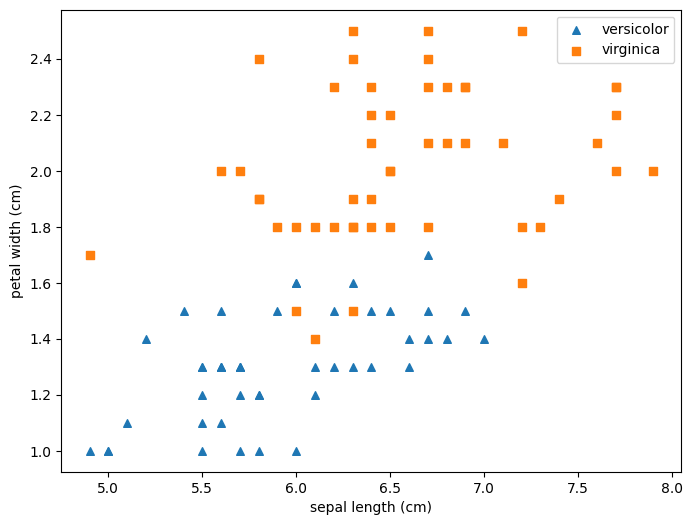

In [ ]:
# Enter the indices (plural of index) of the iris features that we're going to look at
# To make it easy to see what's going on let's take the first two features
feature_indices = (0, 3)

# Let's choose just two species for now to make it a binary classification task
classes = (1, 2)

# Import the data to play with
iris = datasets.load_iris()

# Select the features we want
X = iris.data[:, feature_indices]

print("The original data had shape:", iris.data.shape,
      " after selecting feature indices ", feature_indices,
      "it has shape: ", X.shape)

# Mask the data based on the class target value - this gives us the classes we picked above
data_mask = (iris.target[:] == classes[0]) | (iris.target[:] == classes[1])
X = X[data_mask, :]
y = iris.target[data_mask]

print(" after selecting just classes ", classes,
      "the data has shape: ", X.shape,
      " and the labels have shape: ", y.shape)

plt.figure(figsize=(8, 6))

# Plot each class using different symbols. Loop over the list of classes
symbols = ['o', '^', 's']
for class_value in classes:
    plt.scatter(X[y == class_value, 0], X[y==class_value, 1],
                marker=symbols[class_value], s=30,
                label=iris.target_names[class_value])

plt.legend()
plt.xlabel(iris.feature_names[feature_indices[0]])
plt.ylabel(iris.feature_names[feature_indices[1]])
plt.show()

# Fitting a simple classifier
Now we've explored the data a bit, let's fit a simple linear classifier to see if we can predict what type of Iris it is based on the features.

We'll use a [logistic regression model](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), which I'll explain in a later lecture. But for now, treat it as a black box that fits a line through the data.

We'll first fit the model, and then plot how it separates the data. Don't worry too much about the details of the line plotting code!
+ Run this for different classes and pairs of features


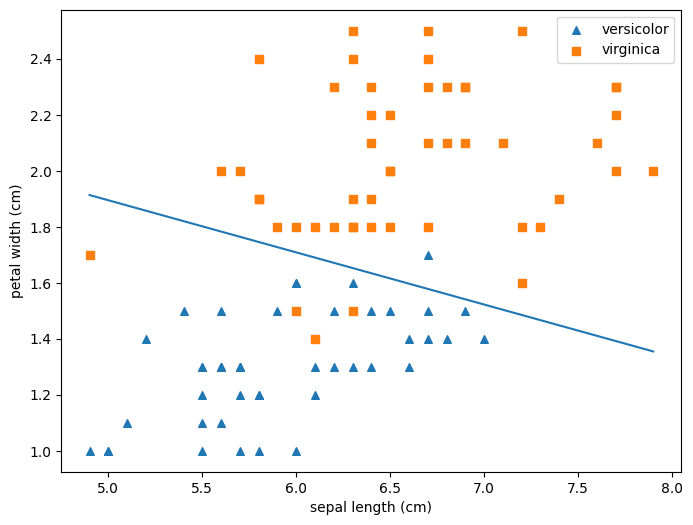

In [ ]:
# Create a classifier object
classifier = linear_model.LogisticRegression()
# Fit it to the data
classifier.fit(X, y)

########################################
## This plotting code is copied from above
plt.figure(figsize=(8, 6))

# Plot each class using different symbols. Loop over the list of classes
symbols = ["o", "^", "s"]
for class_value in classes:
    plt.scatter(
        X[y == class_value, 0],
        X[y == class_value, 1],
        marker=symbols[class_value],
        s=30,
        label=iris.target_names[class_value],
    )

plt.legend()
plt.xlabel(iris.feature_names[feature_indices[0]])
plt.ylabel(iris.feature_names[feature_indices[1]])
########################################

# Don't worry too much about how this plotting code works
# Let's draw the separating line that the classifer learned beween the classes
x_min_max = np.array([np.min(X[:, 0], axis=0), np.max(X[:, 0], axis=0)])
# Get the intercept, slope and normalising factor from the classifier
b, w1, w2 = classifier.intercept_, classifier.coef_[0, 0], classifier.coef_[0, 1]
y_min_max = -(b + x_min_max * w1) / w2
# Draw the line
plt.plot(x_min_max, y_min_max)
plt.show()

# Quantifying classifier performance
We've already talked about how to measure classifier performance using various metrics. scikit-learn makes this quite easy using [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics).

+ Investigate some suitable metrics and run them on your classifier. Note to run the classifier on some data use *classifier.predict*

I've included some code to [plot confusion matrices](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix), note this code plots the matrix. If you want it as an array use [metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

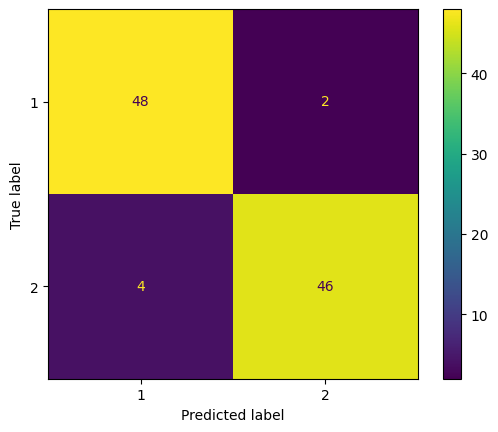

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(classifier, X, y)
#metrics.plot_confusion_matrix(classifier, X, y, display_labels=iris.target_names[0:2])

# Making the problem harder
Well that was easy! But oh wait, we're testing on our training data! Let's adjust that using a simple [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

+ Experiment with the classification metrics you used above with different proportions of training data. Make sure you test it on the **test set**.

In [ ]:
proportion_training = 0.2
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                        train_size=proportion_training,
                                        stratify=y)

# Now train the classifier on the training set
classifier.fit(X_train, y_train)
# We can predict on the test set
y_test_pred = classifier.predict(X_test)

# The full problem
Let's now investigate the full 3 class classification problem, with all the features and a train/test split.

+ Copy the code for a train_test_split from above and train a classifier using all the data
+ Calculate the relevant classification metrics on the test set.
+ What happens if you use fewer data features? Or even just 1? Are some features more useful than others?

In [ ]:
# Get the full data and labels from the Iris data and store in X and y
X = iris.data
y = iris.target
proportion_training = 0.6


# Extension tasks
This lab has investigated a very simple classification task, and demonstrated how to use scikit-learn to build linear classifiers.

Some optional extension task include:
+ Refactor the code so that all the copied and pasted components are now in functions.
+ For the 3 class problem, investigate what the smallest proportion of training data and number of features you can use is while still getting an accuracy above 90%. Are some classes easier than others?
+ Draw the lines of discrimination for the 3 class problem.
+ Investigate how you can change the sensitivity/specificity of a classifier ***after*** training (hint: think about moving the line of discrimination). Can you make a plot of how these metric change as you adjust the classifier? This is called a [receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) curve.